# Table of Contents
1. [Data Gathering](#gathering)
1. [Data Quality Assesment](#assessment)
1. [Data Issues](#issues)
1. [Data Cleaning](#cleaning)
1. [Storing The Data](#storing_data)
1. [Analysing and Visualizing the Data](#analysis)

In [1]:
import numpy as np
import pandas as pd
import requests
import json
import tweepy
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<a id='gathering'></a>
# Data Gathering.

In [5]:
# read the tweet-json copy file and store it in a dataframe
tweet_list =[]
with open('tweet-json copy', mode='r') as file:
    for line in file:
        data = json.loads(line)
        tweet_list.append(data)
# use the list to generate a dataframe for the tweets
tweets_df = pd.DataFrame(tweet_list)

In [6]:
# Select the columnns we will need for our analysis.
tweets_df = tweets_df[['id','retweet_count','favorite_count','full_text','source','favorite_count','retweeted']]


In [7]:
# Read the two other datasets imgprediction.tsv and twitter-archive-enhanced.csv
# Both the datasets was provided by udacity
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [8]:
# imgprediction datasets is downloaded pragmatically through the provided url using the requests' library .get() function.
imgprediction_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# read the image prediction dataset pragmatically using the request library
image_prediction = requests.get(imgprediction_url)
# save the response to a file
open('imgprediction.tsv',mode='wb').write(image_prediction.content)

335079

In [9]:
imageprediction = pd.read_csv('imgprediction.tsv', sep='\t')

<a id='assessment'> </a>
# Data Assessment

In [10]:
# look at the dataframe created from above.
tweets_df.head()

,id,retweet_count,favorite_count,full_text,source,favorite_count,retweeted
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r...",39467,False
1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...",33819,False
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r...",25461,False
3,891689557279858688,8964,42908,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r...",42908,False
4,891327558926688256,9774,41048,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r...",41048,False


In [11]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989...,8,10,a,None,None,None,None
204,852936405516943360,NaN,NaN,2017-04-14 17:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I usually only share these on F...,8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None
1633,684241637099323392,NaN,NaN,2016-01-05 05:14:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Obi. He got camera shy. 12/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684241637...,12,10,Obi,None,None,None,None
439,819952236453363712,NaN,NaN,2017-01-13 17:00:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He has dreams of being a servi...,NaN,NaN,NaN,"https://www.gofundme.com/servicedogoliver,http...",13,10,Oliver,None,None,None,puppo
525,809084759137812480,NaN,NaN,2016-12-14 17:16:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wallace. You said you brushed your tee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/809084759...,11,10,Wallace,None,None,None,None


In [12]:
imageprediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# check the datatypes of the variables are correct using the dtypes method

In [13]:
imageprediction.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [14]:
twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [15]:
tweets_df.dtypes

id                 int64
retweet_count      int64
favorite_count     int64
full_text         object
source            object
favorite_count     int64
retweeted           bool
dtype: object

## check if all the images are for dogs

In [16]:

imageprediction['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [17]:
#confidence level should exceed 1
imageprediction['p1_conf'].max()

1.0

In [18]:
imageprediction['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [19]:
twitter_archive['rating_denominator'].max()
print(twitter_archive['rating_denominator'].value_counts())

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64


<a id='issues'></a>
# Data Issues Identified

# Quality

## Visual Assessment
Through visual assesment the following data quality issues were identified.
1. In the imageprediction dataframe there is mix of uppercase and lowercase in p1,p2, and p3
1. The timestamp column in the twitter_archive dataframe is incorectly represented
1. Null values in several columns in the tweet_archive dataframe
1. The id column in the twitter_archive and the tweet_id column in the tweet_df should be in sync.
1. There are retweets within the dataframes indicated by @ in the full_text column


## Pragmatic Assesment
Through the use of code to asses the datasets the following data quality issues were identified:
1. Retweets are included in the dataset
1. Some pictures in the imageprediction datasets are not for dogs
1. Rating denominator for some tweets is not ten
1. In the dog_stage column some rows have two dog stages

# Tidiness

## Visual Assesment
Through visual assesment the following data tidiness issues were identified.
1. In the tweet_df there are two columns for retweet count with the same values
1. doggo, floofer,pupper,puppo should all be together as one variable
1. Information about one type of observational unit (tweets) is spread across three different files but should be stored in one location.

<a id='cleaning'> </a>
# Data Cleaning.

### Create copies of the original data.

In [20]:
twitter_archive_clean=twitter_archive.copy()
imageprediction_clean=imageprediction.copy()
tweets_df_clean=tweets_df.copy()

### Define
Drop rows with pictures in the imageprediction dataframe which are not for dogs to retain only rows with pictures of dogs.

### Code

In [21]:
# Get the index of all the rows with False in the p1_dog, p2_dog and p3_dog columns
not_dog_index = imageprediction_clean.query('p1_dog== False and p2_dog == False and p3_dog == False').index
# Use the created index to dop all the rows whose pictures are not for dogs.

imageprediction_clean.drop(not_dog_index, inplace=True)

### Check

In [22]:
# Check to see if there are rows with False value in all the three columns
not_dog = imageprediction_clean.query('p1_dog== False and p2_dog == False and p3_dog == False')
len(not_dog)

0

### Define
Convert tweet_id and id columns to a common name

### Code

In [23]:
tweets_df_clean.rename(columns ={'id':'tweet_id'}, inplace = True)

### Check

In [24]:
tweets_df_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'full_text', 'source',
       'favorite_count', 'retweeted'],
      dtype='object')

### Define
Assign the most likely breed and store it in a breed column based on the machine learning prediction provided in the imageprediction_clean dataframe

### Code

In [25]:
# Define a function to assign a likely breed of each picture in the imageprediction datafram
def dog_breed(x):
    '''This function assign dog breed to a row based on the imageprediction values'''
    if x[1]==True:
        return x[0]
    elif x[3] ==True:
        return x[2]
    elif x[5]==True:
        return x[4]
# call the dog breed function and pass the columns to apply the function
imageprediction_clean['breed']=imageprediction_clean[['p1','p1_dog', 'p2', 'p2_dog', 'p3','p3_dog']].apply(dog_breed, axis=1)

### Check

In [26]:
imageprediction_clean['breed'].value_counts()

golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
pug                      65
                       ... 
Scotch_terrier            1
EntleBucher               1
Japanese_spaniel          1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: breed, Length: 113, dtype: int64

### Define
Convert the values in the in p1,p2, and p3 columns in the imageprediction dataframe to lowercase
Use the string format .lower() to convert to lowercase

### Code

In [27]:
imageprediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'breed'],
      dtype='object')

In [28]:
imageprediction_clean['p1'] = imageprediction_clean['p1'].str.lower()
imageprediction_clean['p2']= imageprediction_clean['p2'].str.lower()
imageprediction_clean['p3'] = imageprediction_clean['p3'].str.lower()

### Check

In [29]:
imageprediction_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
120,668190681446379520,https://pbs.twimg.com/media/CUXj4SgXAAETlu6.jpg,1,blenheim_spaniel,0.958402,True,cocker_spaniel,0.026764,True,welsh_springer_spaniel,0.007790,True,Blenheim_spaniel
1455,777621514455814149,https://pbs.twimg.com/media/Csqqoo5WEAAMTVW.jpg,1,chow,0.999823,True,norwich_terrier,0.000056,True,pomeranian,0.000028,True,chow
1575,796031486298386433,https://pbs.twimg.com/media/CwwSaWJWIAASuoY.jpg,1,golden_retriever,0.893775,True,labrador_retriever,0.070140,True,doormat,0.008419,False,golden_retriever
1879,846514051647705089,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,2,golden_retriever,0.650003,True,leonberg,0.065199,True,norfolk_terrier,0.052955,True,golden_retriever
728,686386521809772549,https://pbs.twimg.com/media/CYaI5aaW8AE8Uyk.jpg,1,yorkshire_terrier,0.477704,True,silky_terrier,0.171673,True,australian_terrier,0.088334,True,Yorkshire_terrier
771,689517482558820352,https://pbs.twimg.com/media/CZGofjJW0AINjN9.jpg,1,pembroke,0.799319,True,cardigan,0.189537,True,papillon,0.003386,True,Pembroke
1967,867900495410671616,https://pbs.twimg.com/media/DAtm5MkXoAA4R6P.jpg,1,labrador_retriever,0.522644,True,kuvasz,0.332461,True,dalmatian,0.032008,True,Labrador_retriever
1945,862096992088072192,https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg,2,chow,0.677589,True,pomeranian,0.270648,True,pekinese,0.038110,True,chow
997,708356463048204288,https://pbs.twimg.com/media/CdSWcc1XIAAXc6H.jpg,2,pug,0.871283,True,french_bulldog,0.041820,True,bath_towel,0.015228,False,pug
79,667453023279554560,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,labrador_retriever,0.825670,True,french_bulldog,0.056639,True,staffordshire_bullterrier,0.054018,True,Labrador_retriever


### Define 
Change the rating denominator to be a 10 in all the tweets

### Code

In [30]:
twitter_archive_clean['rating_denominator'] = 10

### Check

In [31]:
twitter_archive_clean['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

### Define
combine the doggo, floofer,pupper, and puppo column to form one column in the twitter archive dataset.

In [32]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Code

In [33]:
dog_stages = ['doggo','floofer','pupper','puppo']
for i in dog_stages:
    twitter_archive_clean[i].replace('None','', inplace=True)
twitter_archive_clean['dog_stage'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']

In [34]:
twitter_archive_clean['dog_stage'].replace('','None', inplace=True)

### Check

In [35]:
twitter_archive_clean['dog_stage'].value_counts()

None            1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

### Define
Remove the second dog_stage name in rows with two dog stage names

### Code

In [36]:
twitter_archive_clean['dog_stage'].replace('doggopupper','Multistage', inplace=True)
twitter_archive_clean['dog_stage'].replace('doggopuppo','Multistage', inplace=True)
twitter_archive_clean['dog_stage'].replace('doggofloofer','Multistage',inplace=True)

### Check

In [37]:
twitter_archive_clean['dog_stage'].value_counts()

None          1976
pupper         245
doggo           83
puppo           29
Multistage      14
floofer          9
Name: dog_stage, dtype: int64

### Remove retweets within the datasets
The rows which are retweets can be identified using the full_text column as it starts with @
Or where the retweets related columns are not blank eg., retweeted_statu_sid

### Code

In [39]:
#Select rows where the retweeted_status_id column is null using the isnull()function
twitter_archive_clean =twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]
# Use the retweeted column to only select rows with False value  in the tweets_df_clean dataframe
tweets_df_clean = tweets_df_clean[tweets_df_clean['retweeted']==False]

In [47]:
### Check
print(twitter_archive_clean.retweeted_status_id.notnull().sum())
print(tweets_df_clean.retweeted.nunique())

0
1


### Define
Drop columns with many null valuess and unnecessary variables from the datasets.
Additionaly, drop the duplicate columns using drop_duplicate() function from the tweets_df_clean dataframe.

### Code

In [48]:
tweets_df.columns

Index(['id', 'retweet_count', 'favorite_count', 'full_text', 'source',
       'favorite_count', 'retweeted'],
      dtype='object')

In [49]:
# To drop one of the columns named 'favorite_count'
#tweets_df_clean.drop_duplicates(inplace =True)

# Remove duplicate columns pandas DataFrame
tweets_df_clean = tweets_df_clean.loc[:,~tweets_df_clean.columns.duplicated()]
tweets_df_clean.drop(['source','retweeted'],axis= 1,inplace=True)
twitter_archive_clean.drop(['retweeted_status_timestamp', 'expanded_urls','doggo', 'floofer', 'pupper', 'puppo'],axis=1, inplace=True)
imageprediction_clean.drop(['jpg_url', 'img_num'], axis = 1, inplace = True)

### Check

In [50]:
print(imageprediction_clean.columns)
print(tweets_df_clean.columns)
print(twitter_archive_clean.columns)

Index(['tweet_id', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'breed'],
      dtype='object')
Index(['tweet_id', 'retweet_count', 'favorite_count', 'full_text'], dtype='object')
Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')


### Define
Remove the +0000 at the end of the 

### Code

In [51]:
twitter_archive_clean['timestamp']=twitter_archive_clean['timestamp'].str.strip('+0000')

### Check

In [52]:
twitter_archive_clean.timestamp.sample()

1040    2016-06-18 17:41:06 
Name: timestamp, dtype: object

<a id='storing_data'></a>
#  Storing the data
## Merge all the datasets using the tweet_id column to form one dataframe which we will then analyse.

In [53]:
tweets_merged= pd.merge(twitter_archive_clean,tweets_df_clean, on= 'tweet_id').merge(imageprediction_clean,on='tweet_id')

In [54]:
tweets_merged.shape

(1686, 25)

In [55]:
tweets_merged.to_csv('twitter_archive_master.csv')

<a id='analysis'></a>
# Analyzing and Visualizing Data
You must produce at least three (3) insights and one (1) visualization.
You must clearly document the piece of assessed and cleaned (if necessary) data used to make each analysis and visualization.
The following insights will be looked at in the dataset.
1. Comparison of retweet and favorite counts
1. Dog breed distribution
1. Dog ratings distribution against favorite count

In [56]:
tweets_merged.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'retweet_count', 'favorite_count', 'full_text', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'breed'],
      dtype='object')

Text(0.5, 1.0, 'Relation Between Favorite Count and Rating')

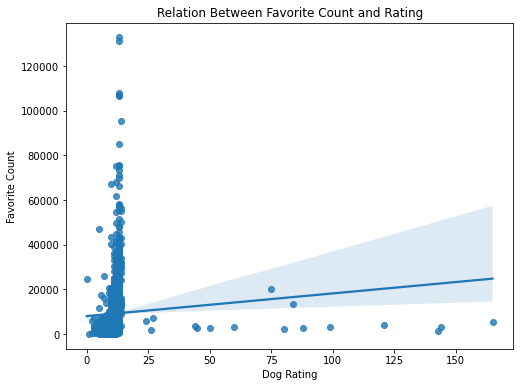

In [57]:
# plot breed against favorite count
plt.figure(figsize=[8,6])
sb.regplot(data=tweets_merged, x='rating_numerator', y='favorite_count')
plt.ylabel('Favorite Count')
plt.xlabel('Dog Rating')
plt.title('Relation Between Favorite Count and Rating')

In [58]:
tweets_merged.breed.value_counts()[:10]

golden_retriever      158
Labrador_retriever    108
Pembroke               95
Chihuahua              91
pug                    62
toy_poodle             51
chow                   48
Samoyed                42
Pomeranian             42
malamute               33
Name: breed, dtype: int64

Text(0.5, 1.0, 'Popular Dog Breeds')

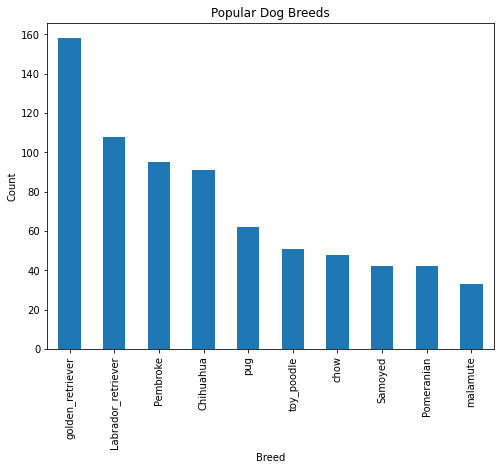

In [59]:
plt.figure(figsize=[8,6])
tweets_merged.breed.value_counts()[:10].plot(kind='bar')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.title('Popular Dog Breeds')


Text(0.5, 1.0, 'Relationship Between Retweet and Favorited Count')

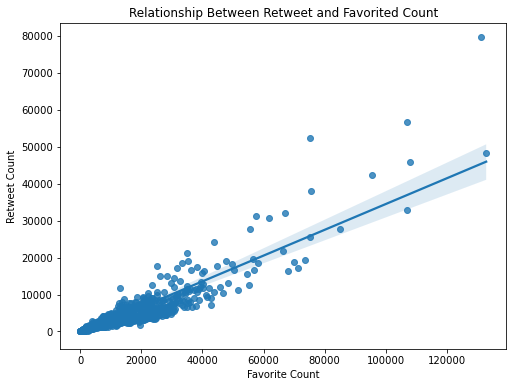

In [60]:
# Check favorite count against retweet count
plt.figure(figsize=[8,6])
sb.regplot(data=tweets_merged, x='favorite_count',y='retweet_count')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Relationship Between Retweet and Favorited Count')